### K-Nearest Neighbor (KNN)

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

#import functions for cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
# Import KNeighborsClassifier Model from sklearn
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve, auc
from sklearn import metrics

from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# read the dataset
data = pd.read_csv("clean_hotel_bookings.csv", index_col='Unnamed: 0')

/Users/vaish.g/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,hotel,is_canceled,is_repeated_guest,reserved_room_type,assigned_room_type,country_is_FRA,country_is_DEU,country_is_other,reserved_assigned_room_type_match,fall,...,stays_in_weekend_nights_minmax,stays_in_week_nights_minmax,stays_in_total_nights_minmax,adults_minmax,children_minmax,babies_minmax,days_in_waiting_list_minmax,adr_minmax,required_car_parking_spaces_minmax,total_of_special_requests_minmax
0,0,0,0,C,C,0,0,1,1,0,...,0.0,0.000000,0.000000,0.036364,0.0,0.0,0.0,0.012355,0.0,0.0
1,0,0,0,C,C,0,0,1,1,0,...,0.0,0.000000,0.000000,0.036364,0.0,0.0,0.0,0.012355,0.0,0.0
2,0,0,0,A,C,0,0,1,0,0,...,0.0,0.166667,0.090909,0.018182,0.0,0.0,0.0,0.157597,0.0,0.0
3,0,0,0,A,A,0,0,1,1,0,...,0.0,0.166667,0.090909,0.018182,0.0,0.0,0.0,0.157597,0.0,0.0
4,0,0,0,A,A,0,0,1,1,0,...,0.0,0.333333,0.181818,0.036364,0.0,0.0,0.0,0.202138,0.0,0.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 58 columns):
hotel                                    119390 non-null int64
is_canceled                              119390 non-null int64
is_repeated_guest                        119390 non-null int64
reserved_room_type                       119390 non-null object
assigned_room_type                       119390 non-null object
country_is_FRA                           119390 non-null int64
country_is_DEU                           119390 non-null int64
country_is_other                         119390 non-null int64
reserved_assigned_room_type_match        119390 non-null int64
fall                                     119390 non-null int64
spring                                   119390 non-null int64
summer                                   119390 non-null int64
winter                                   119390 non-null int64
distribution_channel_Corporate           119390 non-null int64
distr

In [5]:
data['is_canceled'].value_counts(1)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [6]:
features = ['hotel',
            'is_repeated_guest',
            'reserved_assigned_room_type_match',
            'country_is_FRA',
            'country_is_DEU',
            'country_is_other',
            'spring',
            'summer',
            'fall',
            'winter',
            'distribution_channel_Corporate',
            'distribution_channel_Direct',
            'distribution_channel_GDS',
            'distribution_channel_TA/TO',
            'distribution_channel_Undefined',
            'market_segment_Aviation',
            'market_segment_Complementary',
            'market_segment_Corporate',
            'market_segment_Direct',
            'market_segment_Groups',
            'market_segment_Offline TA/TO',
            'market_segment_Online TA',
            'market_segment_Undefined',
            'meal_BB',
            'meal_FB',
            'meal_HB',
            'meal_SC',
            'meal_Undefined',
            'deposit_type_No Deposit',
            'deposit_type_Non Refund',
            'customer_type_Contract',
            'customer_type_Group',
            'customer_type_Transient',
            'customer_type_Transient-Party',
            'agent_14',
            'agent_7',
            'agent_is_other',
            'log_lead_minmax',
            "previous_cancellations_minmax",
            "previous_bookings_not_canceled_minmax",
            "booking_changes_minmax",
            'stays_in_weekend_nights_minmax',
            'stays_in_week_nights_minmax',
            'stays_in_total_nights_minmax',
            'adults_minmax',
            'children_minmax',
            'babies_minmax',
            'days_in_waiting_list_minmax',
            'adr_minmax',
            'required_car_parking_spaces_minmax',
            'total_of_special_requests_minmax'
           ]

label = ['is_canceled']

In [7]:
len(features)

51

In [8]:
# use the names of attributes to split them into independent variables X and target variable y
X = data[features]
y = data.iloc[:,1] # is_cancelled is the label

In [9]:
# try all the values of 'k' from 1 to 50 with a step of 5
# use a for loop to try out differnt values for the 'k'
# sqrt(120,000) = 346. thats why until 400

for k in range(300,400,10):
     
    # define model
    model = KNeighborsClassifier(n_neighbors=k,weights='distance')
    
    # find the accuracy for differnt k
    accuracy = cross_val_score(model,X,y,cv=10).mean()
    print("When k=%d, accuracy=%.3f" % (k, accuracy))

When k=300, accuracy=0.621
When k=310, accuracy=0.621
When k=320, accuracy=0.621
When k=330, accuracy=0.621
When k=340, accuracy=0.621
When k=350, accuracy=0.620
When k=360, accuracy=0.620
When k=370, accuracy=0.620
When k=380, accuracy=0.619
When k=390, accuracy=0.620


In [11]:
# k=340 generates the highest accuracy so we use k=340 in our model
model_f = KNeighborsClassifier(n_neighbors=340,weights='distance')
# model_f = KNeighborsClassifier(n_neighbors=36)

In [12]:
# fit the model
model_f.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=340, p=2,
                     weights='distance')

In [13]:
y_pred = cross_val_predict(model_f,X,y,cv=10)

In [14]:
# final classification report demonstrating the accuracy of the classifier for each digit

# evaluate result 
print("Confusion Matrix:", "\n"+str(confusion_matrix(y,y_pred))+"\n")

print("Accuracy:","\n"+ str(cross_val_score(model_f,X,y,cv=10).mean())+ "\n")

print(classification_report(y,y_pred))

Confusion Matrix: 
[[54899 20267]
 [25001 19223]]

Accuracy: 
0.6208361253698514

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     75166
           1       0.49      0.43      0.46     44224

    accuracy                           0.62    119390
   macro avg       0.59      0.58      0.58    119390
weighted avg       0.61      0.62      0.62    119390



Text(0.5, 0, 'False Positive Rate')

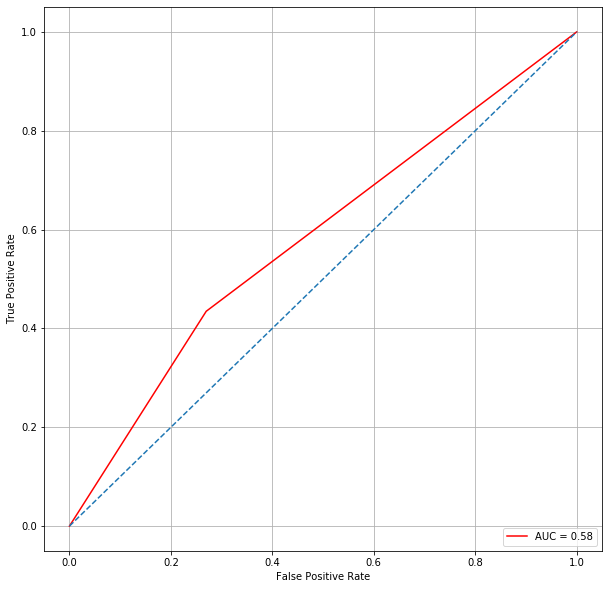

In [15]:
fpr, tpr, thresholds = metrics.roc_curve(y,y_pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')